<a href="https://colab.research.google.com/github/rnoor98/complete-node-bootcamp/blob/master/final_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving time_series_covid_19_confirmed.csv to time_series_covid_19_confirmed.csv


In [29]:
import pandas as pd
import io
tfp = pd.read_csv("time_series_covid_19_confirmed.csv")
tfp = tfp.drop(['5/28/20',	'5/29/20',	'5/30/20',	'5/31/20',	'6/1/20',	'Province/State', 'Lat',	'Long'], axis = 1) 
tfp

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4,8,8,14,16,16,16,23,174,174,187,208,208,208,208,208,220,235,235,235,235,246,251,251,251,251,251,251,299,441,443
262,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51,56,65,70,85,106,122,128,130,167,184,197,209,212,222,233,249,256
263,Comoros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,3,8,8,8,11,11,11,11,11,11,11,11,11,11,11,34,34,78,78,87,87,87,87
264,Tajikistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,15,15,76,128,230,293,379,461,522,612,612,661,729,801,907,1118,1322,1524,1729,1936,2140,2350,2551,2738,2929,3100,3266,3424


In [30]:
tfp = tfp.groupby(["Country/Region"]).sum()
tfp.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,23,23,23,23,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428,4532,4681,4783,4887,5020,5208,5371,5611,5776,6034,6278,6563,6879,7134,7479,7805,8068,8371,8809,9283,9931,10649,11353,12076,12628,13228,13933
Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1248,1291,1339,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066,2148,2273,2386,2507,2619,2782,2884,3029,3175,3313,3392,3538,3718,3860,4044,4283,4472,4823,5041,5271,5606,5928,6302,6661,7113,7402,7774
Australia,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,...,6568,6610,6623,6645,6652,6662,6677,6694,6714,6721,6744,6752,6766,6778,6799,6822,6847,6875,6894,6913,6918,6939,6948,6970,6980,6989,7019,7035,7044,7054,7068,7072,7081,7095,7099,7114,7114,7126,7139,7150


In [31]:
is_p = (tfp.index.values == 'Pakistan')
cts = tfp.index.values

co = []

p = tfp[is_p].iloc[0]
for i in range(len(tfp)):
  co.append(p.corr(tfp.iloc[i]))
tfp["Correlation"] = co

tfp =  tfp.sort_values(by ='Correlation', ascending=False)
tfp = tfp[tfp['5/27/20'] > 1000]

tfp

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,Correlation
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Pakistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,4,4,...,8348,8418,9565,10076,11155,11940,12723,13328,13915,14612,15525,16817,18114,19103,20084,20941,22049,24073,24644,26435,28736,30334,32081,34336,35298,35788,38799,38799,40151,42125,43966,45898,48091,50694,52437,54601,56349,57705,59151,1.000000
Saudi Arabia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9362,10484,11631,12772,13930,15102,16299,17522,18811,20077,21402,22753,24097,25459,27011,28656,30251,31938,33731,35432,37136,39048,41014,42925,44830,46869,49176,52016,54752,57345,59854,62545,65077,67719,70161,72560,74795,76726,78541,0.998967
Qatar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,5448,6015,6533,7141,7764,8525,9358,10287,11244,11921,12564,13409,14096,14872,15551,16191,17142,17972,18890,20201,21331,22520,23623,25149,26539,28272,29425,30972,32604,33969,35606,37097,38651,40481,42213,43714,45465,47207,48947,0.998740
Colombia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3792,3977,4149,4356,4561,4881,5142,5379,5597,5949,6207,6507,7006,7285,7668,7973,8613,8959,9456,10051,10495,11063,11613,12272,12930,13610,14216,14939,15574,16295,16935,17687,18330,19131,20177,21175,21981,23003,24104,0.998703
Peru,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15628,16325,17837,19250,20914,21648,25331,27517,28699,31190,33931,36976,40459,42534,45928,47372,51189,54817,58526,61847,65015,67307,68822,72059,76306,80604,84495,88541,92273,94933,99483,104020,108769,111698,115754,119959,123979,129751,135905,0.998608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Austria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,3,9,14,...,14749,14795,14873,14925,15002,15071,15148,15225,15274,15357,15402,15452,15531,15558,15597,15621,15650,15684,15752,15774,15833,15871,15882,15961,15997,16058,16109,16201,16242,16269,16321,16353,16404,16436,16486,16503,16539,16557,16591,0.731123
Australia,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,...,6610,6623,6645,6652,6662,6677,6694,6714,6721,6744,6752,6766,6778,6799,6822,6847,6875,6894,6913,6918,6939,6948,6970,6980,6989,7019,7035,7044,7054,7068,7072,7081,7095,7099,7114,7114,7126,7139,7150,0.714651
Iceland,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,...,1771,1773,1778,1785,1789,1789,1790,1792,1792,1795,1797,1797,1798,1798,1799,1799,1799,1799,1801,1801,1801,1801,1801,1801,1802,1802,1802,1802,1802,1802,1802,1803,1803,1803,1804,1804,1804,1804,1805,0.693624


In [32]:
tfp.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,Correlation
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Pakistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,4,4,...,8348,8418,9565,10076,11155,11940,12723,13328,13915,14612,15525,16817,18114,19103,20084,20941,22049,24073,24644,26435,28736,30334,32081,34336,35298,35788,38799,38799,40151,42125,43966,45898,48091,50694,52437,54601,56349,57705,59151,1.000000
Saudi Arabia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9362,10484,11631,12772,13930,15102,16299,17522,18811,20077,21402,22753,24097,25459,27011,28656,30251,31938,33731,35432,37136,39048,41014,42925,44830,46869,49176,52016,54752,57345,59854,62545,65077,67719,70161,72560,74795,76726,78541,0.998967
Qatar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,5448,6015,6533,7141,7764,8525,9358,10287,11244,11921,12564,13409,14096,14872,15551,16191,17142,17972,18890,20201,21331,22520,23623,25149,26539,28272,29425,30972,32604,33969,35606,37097,38651,40481,42213,43714,45465,47207,48947,0.998740
Colombia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3792,3977,4149,4356,4561,4881,5142,5379,5597,5949,6207,6507,7006,7285,7668,7973,8613,8959,9456,10051,10495,11063,11613,12272,12930,13610,14216,14939,15574,16295,16935,17687,18330,19131,20177,21175,21981,23003,24104,0.998703
Peru,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15628,16325,17837,19250,20914,21648,25331,27517,28699,31190,33931,36976,40459,42534,45928,47372,51189,54817,58526,61847,65015,67307,68822,72059,76306,80604,84495,88541,92273,94933,99483,104020,108769,111698,115754,119959,123979,129751,135905,0.998608
Egypt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,...,3144,3333,3490,3659,3891,4092,4319,4534,4782,5042,5268,5537,5895,6193,6465,6813,7201,7588,7981,8476,8964,9400,9746,10093,10431,10829,11228,11719,12229,12764,13484,14229,15003,15786,16513,17265,17967,18756,19666,0.998586
Mexico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,...,8261,8772,9501,10544,11633,12872,13842,14677,15529,16752,17799,19224,20739,22088,23471,24905,26025,27634,29616,31522,33460,35022,36327,38324,40186,42595,45032,47144,49219,51633,54346,56594,59567,62527,65856,68620,71105,74560,78023,0.998245
Senegal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,367,377,412,442,479,545,614,671,736,823,882,933,1024,1115,1182,1271,1329,1433,1492,1551,1634,1709,1886,1995,2105,2189,2310,2429,2480,2544,2617,2714,2812,2909,2976,3047,3130,3161,3253,0.998025
Bahrain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,33,33,36,41,47,...,1881,1907,1973,2027,2217,2518,2588,2647,2723,2811,2921,3040,3170,3284,3383,3533,3720,3934,4199,4444,4774,4941,5236,5531,5816,6198,6583,6747,6956,7184,7532,7888,8174,8414,8802,9138,9171,9366,9692,0.997894


In [0]:
import matplotlib.pyplot as plt

In [34]:
tfp = tfp.drop(["Correlation"], axis = 1)
tfp

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Pakistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,4,4,...,7638,8348,8418,9565,10076,11155,11940,12723,13328,13915,14612,15525,16817,18114,19103,20084,20941,22049,24073,24644,26435,28736,30334,32081,34336,35298,35788,38799,38799,40151,42125,43966,45898,48091,50694,52437,54601,56349,57705,59151
Saudi Arabia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8274,9362,10484,11631,12772,13930,15102,16299,17522,18811,20077,21402,22753,24097,25459,27011,28656,30251,31938,33731,35432,37136,39048,41014,42925,44830,46869,49176,52016,54752,57345,59854,62545,65077,67719,70161,72560,74795,76726,78541
Qatar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,5008,5448,6015,6533,7141,7764,8525,9358,10287,11244,11921,12564,13409,14096,14872,15551,16191,17142,17972,18890,20201,21331,22520,23623,25149,26539,28272,29425,30972,32604,33969,35606,37097,38651,40481,42213,43714,45465,47207,48947
Colombia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3439,3792,3977,4149,4356,4561,4881,5142,5379,5597,5949,6207,6507,7006,7285,7668,7973,8613,8959,9456,10051,10495,11063,11613,12272,12930,13610,14216,14939,15574,16295,16935,17687,18330,19131,20177,21175,21981,23003,24104
Peru,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14420,15628,16325,17837,19250,20914,21648,25331,27517,28699,31190,33931,36976,40459,42534,45928,47372,51189,54817,58526,61847,65015,67307,68822,72059,76306,80604,84495,88541,92273,94933,99483,104020,108769,111698,115754,119959,123979,129751,135905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Austria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,3,9,14,...,14671,14749,14795,14873,14925,15002,15071,15148,15225,15274,15357,15402,15452,15531,15558,15597,15621,15650,15684,15752,15774,15833,15871,15882,15961,15997,16058,16109,16201,16242,16269,16321,16353,16404,16436,16486,16503,16539,16557,16591
Australia,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,...,6568,6610,6623,6645,6652,6662,6677,6694,6714,6721,6744,6752,6766,6778,6799,6822,6847,6875,6894,6913,6918,6939,6948,6970,6980,6989,7019,7035,7044,7054,7068,7072,7081,7095,7099,7114,7114,7126,7139,7150
Iceland,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,...,1760,1771,1773,1778,1785,1789,1789,1790,1792,1792,1795,1797,1797,1798,1798,1799,1799,1799,1799,1801,1801,1801,1801,1801,1801,1802,1802,1802,1802,1802,1802,1802,1803,1803,1803,1804,1804,1804,1804,1805


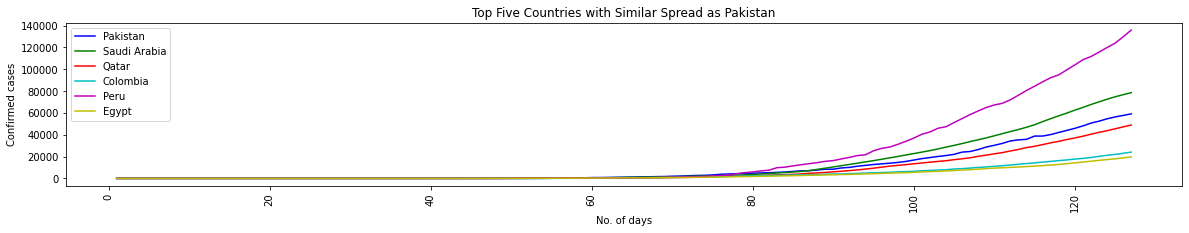

In [42]:
#All countries together
xx = list(tfp)
days = []
for i in range(len(xx)):
  days.append(i+1)

ctsn = tfp.index.values
cols = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'r' ,'b' ,'g' ]

fig = plt.figure(figsize=(20,3))
plt.title("Top Five Countries with Similar Spread as Pakistan")
for i in range(6):

  p = tfp.iloc[i].tolist() 


  plt.plot(days, p, color= cols[i])
plt.xlabel('No. of days')
plt.xticks(rotation=90)
plt.ylabel('Confirmed cases')
plt.legend(ctsn)
plt.show()


In [46]:
tfp5 = tfp.head(6)
tfp5

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Pakistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,4,4,...,7638,8348,8418,9565,10076,11155,11940,12723,13328,13915,14612,15525,16817,18114,19103,20084,20941,22049,24073,24644,26435,28736,30334,32081,34336,35298,35788,38799,38799,40151,42125,43966,45898,48091,50694,52437,54601,56349,57705,59151
Saudi Arabia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8274,9362,10484,11631,12772,13930,15102,16299,17522,18811,20077,21402,22753,24097,25459,27011,28656,30251,31938,33731,35432,37136,39048,41014,42925,44830,46869,49176,52016,54752,57345,59854,62545,65077,67719,70161,72560,74795,76726,78541
Qatar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,5008,5448,6015,6533,7141,7764,8525,9358,10287,11244,11921,12564,13409,14096,14872,15551,16191,17142,17972,18890,20201,21331,22520,23623,25149,26539,28272,29425,30972,32604,33969,35606,37097,38651,40481,42213,43714,45465,47207,48947
Colombia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3439,3792,3977,4149,4356,4561,4881,5142,5379,5597,5949,6207,6507,7006,7285,7668,7973,8613,8959,9456,10051,10495,11063,11613,12272,12930,13610,14216,14939,15574,16295,16935,17687,18330,19131,20177,21175,21981,23003,24104
Peru,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14420,15628,16325,17837,19250,20914,21648,25331,27517,28699,31190,33931,36976,40459,42534,45928,47372,51189,54817,58526,61847,65015,67307,68822,72059,76306,80604,84495,88541,92273,94933,99483,104020,108769,111698,115754,119959,123979,129751,135905
Egypt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,...,3032,3144,3333,3490,3659,3891,4092,4319,4534,4782,5042,5268,5537,5895,6193,6465,6813,7201,7588,7981,8476,8964,9400,9746,10093,10431,10829,11228,11719,12229,12764,13484,14229,15003,15786,16513,17265,17967,18756,19666


In [170]:
saudidata = tfp5.iloc[1].to_numpy()
saudidata


array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     1,     1,     1,     5,     5,
           5,    11,    15,    20,    21,    45,    86,   103,   103,
         118,   171,   171,   274,   344,   392,   511,   562,   767,
         900,  1012,  1104,  1203,  1299,  1453,  1563,  1720,  1885,
        2039,  2179,  2402,  2605,  2795,  2932,  3287,  3651,  4033,
        4462,  4934,  5369,  5862,  6380,  7142,  8274,  9362, 10484,
       11631, 12772, 13930, 15102, 16299, 17522, 18811, 20077, 21402,
       22753, 24097, 25459, 27011, 28656, 30251, 31938, 33731, 35432,
       37136, 39048, 41014, 42925, 44830, 46869, 49176, 52016, 54752,
       57345, 59854, 62545, 65077, 67719, 70161, 72560, 74795, 76726,
       78541])

In [172]:
f = [0]*len(saudidata)
for i in reversed(range(len(saudidata))):
  f[i] = saudidata[i] - saudidata[i-1]
f[0] = 0
f = np.array(f)
f

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    4,
          0,    0,    6,    4,    5,    1,   24,   41,   17,    0,   15,
         53,    0,  103,   70,   48,  119,   51,  205,  133,  112,   92,
         99,   96,  154,  110,  157,  165,  154,  140,  223,  203,  190,
        137,  355,  364,  382,  429,  472,  435,  493,  518,  762, 1132,
       1088, 1122, 1147, 1141, 1158, 1172, 1197, 1223, 1289, 1266, 1325,
       1351, 1344, 1362, 1552, 1645, 1595, 1687, 1793, 1701, 1704, 1912,
       1966, 1911, 1905, 2039, 2307, 2840, 2736, 2593, 2509, 2691, 2532,
       2642, 2442, 2399, 2235, 1931, 1815])

In [0]:
test_data_size = 18
train_data = f[:-test_data_size]
test_data = f[-test_data_size:]

In [174]:
train_data

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    4,
          0,    0,    6,    4,    5,    1,   24,   41,   17,    0,   15,
         53,    0,  103,   70,   48,  119,   51,  205,  133,  112,   92,
         99,   96,  154,  110,  157,  165,  154,  140,  223,  203,  190,
        137,  355,  364,  382,  429,  472,  435,  493,  518,  762, 1132,
       1088, 1122, 1147, 1141, 1158, 1172, 1197, 1223, 1289, 1266, 1325,
       1351, 1344, 1362, 1552, 1645, 1595, 1687, 1793, 1701, 1704])

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data.reshape(-1, 1))

In [0]:
#train_data_normalized

In [0]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [0]:
train_window = 7

In [0]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [0]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)


In [0]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [0]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [184]:
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [185]:
epochs = 150

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.04115823
epoch:  26 loss: 0.00102487
epoch:  51 loss: 0.00078166
epoch:  76 loss: 0.00031420
epoch: 101 loss: 0.00902643
epoch: 126 loss: 0.00083630
epoch: 149 loss: 0.0004517073


In [201]:
fut_pred = 18

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.7311767935752869, 0.8349135518074036, 0.7791411280632019, 0.8817623853683472, 1.0, 0.89737868309021, 0.9007250666618347]


In [0]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [203]:
test_inputs

[0.7311767935752869,
 0.8349135518074036,
 0.7791411280632019,
 0.8817623853683472,
 1.0,
 0.89737868309021,
 0.9007250666618347,
 1.2931100130081177,
 0.46990767121315,
 0.592170238494873,
 0.21604761481285095,
 0.27066513895988464,
 0.4612288773059845,
 0.5977172255516052,
 0.6858626008033752,
 0.5204286575317383,
 0.5093499422073364,
 0.3772878348827362,
 0.3147237300872803,
 0.4572175443172455,
 0.5047959685325623,
 0.5838769674301147,
 0.47571879625320435,
 0.5750834345817566,
 0.32708755135536194]

In [204]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[2055.77312666]
 [1317.77222724]
 [1427.38061881]
 [1090.18668668]
 [1139.15129708]
 [1309.9916885 ]
 [1432.35349271]
 [1511.37582162]
 [1363.06429148]
 [1353.13222319]
 [1234.73854397]
 [1178.64982402]
 [1306.39552848]
 [1349.04958579]
 [1419.9457013 ]
 [1322.98190084]
 [1412.0622991 ]
 [1189.73398979]]


In [205]:
print(test_data[:len(actual_predictions)])

[1912 1966 1911 1905 2039 2307 2840 2736 2593 2509 2691 2532 2642 2442
 2399 2235 1931 1815]


In [211]:
x = np.arange(110, 128, 1)
print(x)

[110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127]


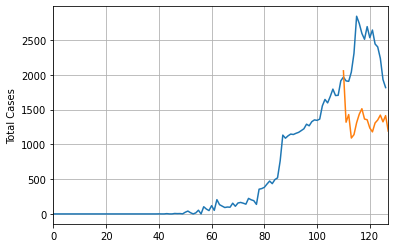

In [212]:
plt.title('')
plt.ylabel('Total Cases')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(f)
plt.plot(x,actual_predictions)
plt.show()